
# **Step1** : Understand the Problem
The goal is to classify news headlines into one of four categories:

1-World

2-Sports

3-Business

4-Science/Technology

We will use the AG News Dataset, which contains 120,000 training samples and 7,600 test samples. Each sample consists of a headline and a label (0-3).

# Step 2: Load and Explore the Dataset
Before diving into modeling, it's important to understand the dataset.

In [8]:
# IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [10]:
# Load dataset
# Install the datasets package
%pip install datasets
from datasets import load_dataset


# Load the AG News dataset
dataset = load_dataset('ag_news')
train_data = pd.DataFrame(dataset['train'])
test_data = pd.DataFrame(dataset['test'])


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Explore the dataset
print(f"Training samples: {len(train_data)}")
print(f"\n Test samples: {len(test_data)}")
print("\nSample headline:", train_data['text'][0])
print("\nSample label:", train_data['label'][0])
print("\n number of null values in the dataset",train_data.isnull().sum())
print("\n number of null values in the dataset",test_data.isnull().sum())
test_data.head()
train_data.head()


Training samples: 120000

 Test samples: 7600

Sample headline: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Sample label: 2

 number of null values in the dataset text     0
label    0
dtype: int64

 number of null values in the dataset text     0
label    0
dtype: int64


,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


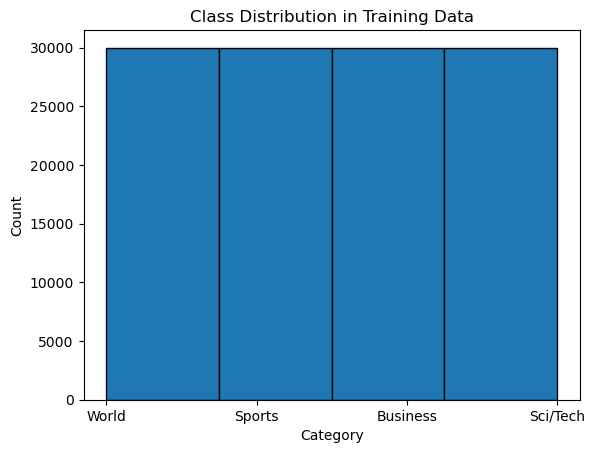

In [12]:

# Check class distribution
import matplotlib.pyplot as plt

labels = train_data['label'].tolist()
plt.hist(labels, bins=4, edgecolor='black')
plt.xticks([0, 1, 2, 3], ['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title("Class Distribution in Training Data")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

 The dataset is **balanced**, with roughly equal samples for each category.

# **Step 3**: Preprocess the Text
Text data cannot be directly fed into machine learning models. We need to convert it into numerical features.

3.1 Tokenization
Tokenization splits text into individual words or tokens.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Example of tokenization
sample_text = "This is a sample headline."
vectorizer = CountVectorizer()
X_sample = vectorizer.fit_transform([sample_text])
print("Tokens:", vectorizer.get_feature_names_out())

Tokens: ['headline' 'is' 'sample' 'this']


3.2 TF-IDF Vectorization
TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to words based on their importance in a document relative to the entire dataset.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',  # Remove common words like "the"
    max_features=5000,     # Limit vocabulary size for efficiency
    lowercase=True         # Convert text to lowercase
)

# Fit TF-IDF on training data
X_train = tfidf.fit_transform(train_data['text'])
y_train = train_data['label']

# Transform test data
X_test = tfidf.transform(test_data['text'])
y_test = test_data['label']

# Step 4: Train and Compare Classifiers
We will train multiple classifiers and compare their performance.

# 4.1 Logistic Regression
Logistic Regression is a simple and effective model for text classification

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Train Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Evaluate on test data
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", accuracy_lr)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Logistic Regression accuracy: 0.9042105263157895
Logistic Regression Report:
              precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



# 4.2 Decision Tree
Decision Trees are interpretable but can overfit on text data.

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, y_train)

# Evaluate on test data

y_pred_dt = model_dt.predict(X_test)
accuracy_decision_tree = model_dt.score(X_test, y_test)
print("Decision Tree accuracy:", accuracy_decision_tree)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Decision Tree accuracy: 0.45
Decision Tree Report:
              precision    recall  f1-score   support

       World       0.87      0.37      0.52      1900
      Sports       0.93      0.27      0.42      1900
    Business       0.86      0.19      0.31      1900
    Sci/Tech       0.32      0.97      0.48      1900

    accuracy                           0.45      7600
   macro avg       0.75      0.45      0.43      7600
weighted avg       0.75      0.45      0.43      7600



# 4.3 K-Nearest Neighbors (KNN)
KNN is simple but computationally expensive for large datasets.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

# Evaluate on test data
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = model_knn.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)
print("KNN Report:")
print(classification_report(y_test, y_pred_knn, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

KNN accuracy: 0.8807894736842106
KNN Report:
              precision    recall  f1-score   support

       World       0.86      0.90      0.88      1900
      Sports       0.92      0.94      0.93      1900
    Business       0.87      0.84      0.85      1900
    Sci/Tech       0.87      0.84      0.86      1900

    accuracy                           0.88      7600
   macro avg       0.88      0.88      0.88      7600
weighted avg       0.88      0.88      0.88      7600



# 4.4 AdaBoost
AdaBoost is an ensemble method that combines weak classifiers.

In [38]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
model_ab = AdaBoostClassifier()
model_ab.fit(X_train, y_train)

# Evaluate on test data
y_pred_ab = model_ab.predict(X_test)
accuracy_ab = model_ab.score(X_test, y_test)
print("AdaBoost accuracy:", accuracy_ab)
print("AdaBoost Report:")
print(classification_report(y_test, y_pred_ab, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

AdaBoost accuracy: 0.6598684210526315
AdaBoost Report:
              precision    recall  f1-score   support

       World       0.75      0.62      0.68      1900
      Sports       0.88      0.70      0.78      1900
    Business       0.62      0.55      0.58      1900
    Sci/Tech       0.51      0.76      0.61      1900

    accuracy                           0.66      7600
   macro avg       0.69      0.66      0.67      7600
weighted avg       0.69      0.66      0.67      7600



# Step 5: Visualize Results for all alogorhim 




0.9042105263157895 0.45 0.8807894736842106 0.6598684210526315


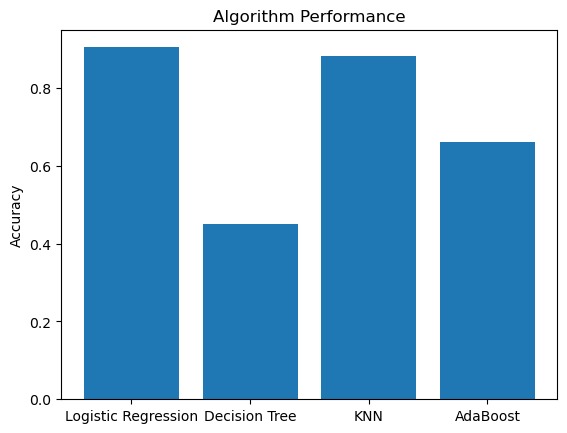

In [42]:
# visualize the results
algorithms = ['Logistic Regression', 'Decision Tree', 'KNN', 'AdaBoost']
print(accuracy_lr, accuracy_decision_tree, accuracy_knn, accuracy_ab)
accuracies = [accuracy_lr, accuracy_decision_tree, accuracy_knn, accuracy_ab]
plt.bar(algorithms, accuracies)
plt.ylabel('Accuracy')
plt.title('Algorithm Performance')
plt.show()


as we can see here the logistic Regression is the highest one 

Logistic Regression performs the best due to its ability to handle high-dimensional text data.
And the KNN is also have a good performs 

Decision Trees and AdaBoot struggle with overfitting and computational complexity